<a href="https://colab.research.google.com/github/BackBenchDreamer/AAMWS/blob/main/AAMWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
data_path = "/content/drive/MyDrive/Research/AAMWS/Resources/"
prediction_path = "/content/drive/MyDrive/Research/AAMWS/Predictions/"

# Wind velocities and file names
wind_velocities = [10, 14, 17, 21, 25, 28]
files = [f"GFRP_{v}ms.csv" for v in wind_velocities]

# Dictionary to store data
data_dict = {}

# Fix wind velocity column and save corrected files
for v, file in zip(wind_velocities, files):
    file_path = os.path.join(data_path, file)

    if os.path.exists(file_path):
        df = pd.read_csv(file_path)

        # Update the Wind Velocity column
        df["Wind Velocity"] = v

        # Save the corrected file
        df.to_csv(file_path, index=False)
        print(f"Updated and saved: {file}")
    else:
        print(f"File not found: {file_path}")

# Verify changes
for v in wind_velocities:
    df = pd.read_csv(os.path.join(data_path, f"GFRP_{v}ms.csv"))
    print(f"Checking {v} m/s dataset - Unique Wind Velocities:", df["Wind Velocity"].unique())


Mounted at /content/drive
Updated and saved: GFRP_10ms.csv
Updated and saved: GFRP_14ms.csv
Updated and saved: GFRP_17ms.csv
Updated and saved: GFRP_21ms.csv
Updated and saved: GFRP_25ms.csv
Updated and saved: GFRP_28ms.csv
Checking 10 m/s dataset - Unique Wind Velocities: [10]
Checking 14 m/s dataset - Unique Wind Velocities: [14]
Checking 17 m/s dataset - Unique Wind Velocities: [17]
Checking 21 m/s dataset - Unique Wind Velocities: [21]
Checking 25 m/s dataset - Unique Wind Velocities: [25]
Checking 28 m/s dataset - Unique Wind Velocities: [28]


In [ ]:
import pandas as pd
import os

# Path to dataset folder
data_path = "/content/drive/MyDrive/Research/AAMWS/Resources/"

# Wind velocities and corresponding file names
wind_velocities = [10, 14, 17, 21, 25, 28]
files = [f"GFRP_{v}ms.csv" for v in wind_velocities]

# Dictionary to store datasets
data_dict = {}

# Load datasets and check for NaNs
for v, file in zip(wind_velocities, files):
    file_path = os.path.join(data_path, file)

    # Read the dataset
    df = pd.read_csv(file_path)

    # Check for NaN values
    nan_count = df.isna().sum()

    print(f"Checking for NaNs in {v} m/s dataset:")
    print(nan_count, "\n")

    # If there are NaNs, we can decide how to handle them
    if nan_count.sum() > 0:
        # Option 1: Drop rows with NaNs (if very few NaNs)
        df = df.dropna()

        # Option 2: Fill NaNs with interpolation or mean (if dropping is not ideal)
        # df = df.interpolate()  # Linear interpolation
        # df = df.fillna(df.mean())  # Fill with column mean

        # Save the cleaned dataset back
        df.to_csv(file_path, index=False)
        print(f"Fixed NaNs and saved updated dataset for {v} m/s.\n")

    # Store the cleaned data
    data_dict[v] = df


Checking for NaNs in 10 m/s dataset:
Time             0
Acceleration     0
Displacement     0
Velocity         0
Wind Velocity    0
dtype: int64 

Checking for NaNs in 14 m/s dataset:
Time             0
Acceleration     0
Displacement     0
Velocity         0
Wind Velocity    0
dtype: int64 

Checking for NaNs in 17 m/s dataset:
Time             0
Acceleration     0
Displacement     0
Velocity         0
Wind Velocity    0
dtype: int64 

Checking for NaNs in 21 m/s dataset:
Time             0
Acceleration     0
Displacement     0
Velocity         0
Wind Velocity    0
dtype: int64 

Checking for NaNs in 25 m/s dataset:
Time             0
Acceleration     0
Displacement     0
Velocity         0
Wind Velocity    0
dtype: int64 

Checking for NaNs in 28 m/s dataset:
Time             0
Acceleration     0
Displacement     0
Velocity         0
Wind Velocity    0
dtype: int64 



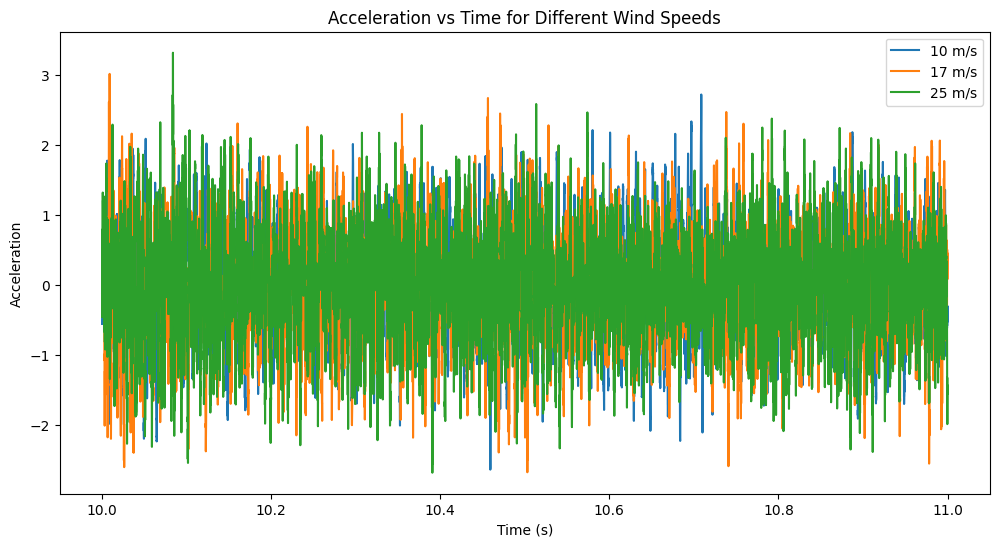

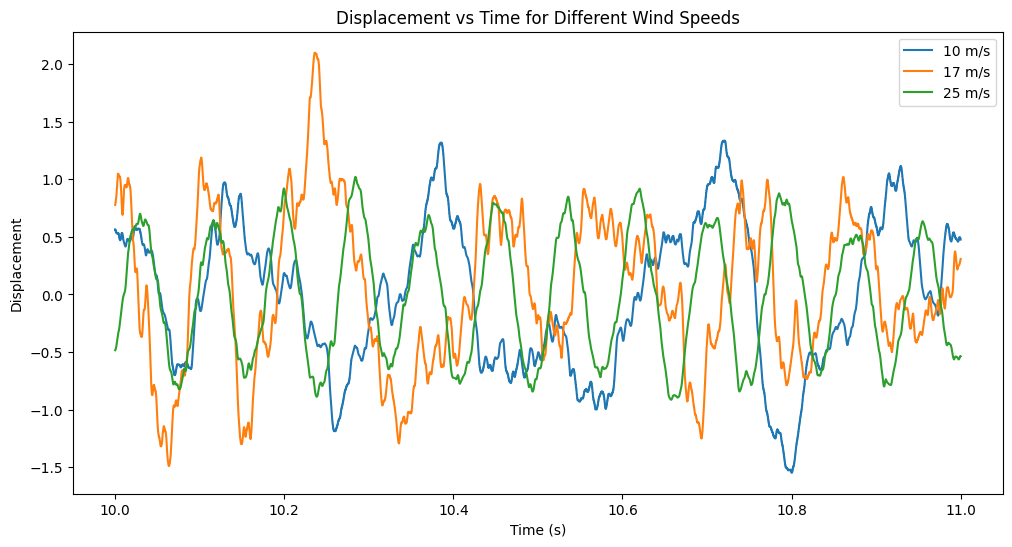

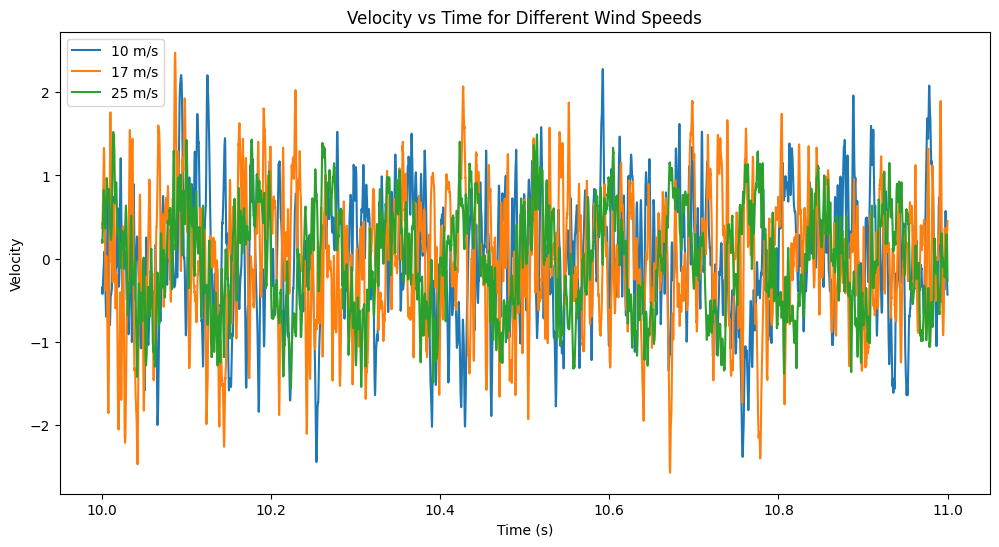

In [ ]:
import matplotlib.pyplot as plt

# Select a few wind speeds to plot
selected_wind_speeds = [10, 17, 25]  # Choosing 3 datasets for clarity

# Plot acceleration over time for selected wind speeds
plt.figure(figsize=(12, 6))
for v in selected_wind_speeds:
    df = data_dict[v]
    plt.plot(df["Time"], df["Acceleration"], label=f"{v} m/s")

plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.title("Acceleration vs Time for Different Wind Speeds")
plt.legend()
plt.show()

# Plot displacement over time
plt.figure(figsize=(12, 6))
for v in selected_wind_speeds:
    df = data_dict[v]
    plt.plot(df["Time"], df["Displacement"], label=f"{v} m/s")

plt.xlabel("Time (s)")
plt.ylabel("Displacement")
plt.title("Displacement vs Time for Different Wind Speeds")
plt.legend()
plt.show()

# Plot velocity over time
plt.figure(figsize=(12, 6))
for v in selected_wind_speeds:
    df = data_dict[v]
    plt.plot(df["Time"], df["Velocity"], label=f"{v} m/s")

plt.xlabel("Time (s)")
plt.ylabel("Velocity")
plt.title("Velocity vs Time for Different Wind Speeds")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Define sequence length
sequence_length = 400  # You can adjust this if needed

# Prepare sequences and labels
def create_sequences(df, sequence_length):
    X, y = [], []
    data = df[['Acceleration', 'Displacement', 'Velocity', 'Wind Velocity']].values  # Use all features

    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])  # Create input sequence
        y.append(data[i+sequence_length, 1])  # Predicting displacement

    return np.array(X), np.array(y)

# Combine data from all wind velocities
X_all, y_all = [], []

for v, df in data_dict.items():
    X_seq, y_seq = create_sequences(df, sequence_length)
    X_all.append(X_seq)
    y_all.append(y_seq)

# Convert lists to numpy arrays
X_all = np.vstack(X_all)
y_all = np.hstack(y_all)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Print the shapes
print(f"Training Data Shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, Labels: {y_test.shape}")


Training Data Shape: (94084, 400, 4), Labels: (94084,)
Testing Data Shape: (23522, 400, 4), Labels: (23522,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model with an extra LSTM layer
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(400, 4)),  # First LSTM Layer
    Dropout(0.2),  # Helps prevent overfitting

    LSTM(64, return_sequences=False),  # Extra LSTM Layer (New)
    Dropout(0.2),

    Dense(32, activation='relu'),  # Fully connected layer
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 400, 128)            │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 400, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,617 (467.25 KB)

 Trainable params: 119,617 (467.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

# Check available GPUs
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

# Ensure TensorFlow is using GPU
print("Is TensorFlow using GPU?", tf.test.is_gpu_available())
print("GPU Device Name:", tf.test.gpu_device_name())


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Is TensorFlow using GPU? True
GPU Device Name: /device:GPU:0


Epoch 1/20
2941/2941 ━━━━━━━━━━━━━━━━━━━━ 90s 30ms/step - loss: 0.0600 - val_loss: 0.0103 - learning_rate: 0.0010
Epoch 2/20
2941/2941 ━━━━━━━━━━━━━━━━━━━━ 142s 30ms/step - loss: 0.0051 - val_loss: 0.0055 - learning_rate: 0.0010
Epoch 3/20
2941/2941 ━━━━━━━━━━━━━━━━━━━━ 141s 29ms/step - loss: 0.0029 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 4/20
2941/2941 ━━━━━━━━━━━━━━━━━━━━ 142s 30ms/step - loss: 0.0024 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 5/20
2941/2941 ━━━━━━━━━━━━━━━━━━━━ 143s 30ms/step - loss: 0.0022 - val_loss: 0.0199 - learning_rate: 0.0010
Epoch 6/20
2941/2941 ━━━━━━━━━━━━━━━━━━━━ 142s 30ms/step - loss: 0.0134 - val_loss: 0.0162 - learning_rate: 0.0010
Epoch 7/20
2940/2941 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0053
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
2941/2941 ━━━━━━━━━━━━━━━━━━━━ 140s 29ms/step - loss: 0.0053 - val_loss: 0.0244 - learning_rate: 0.0010
Epoch 8/20
2941/2941 ━━━━━━━━━━━━━━━━━━━━ 88s 30ms/step - los

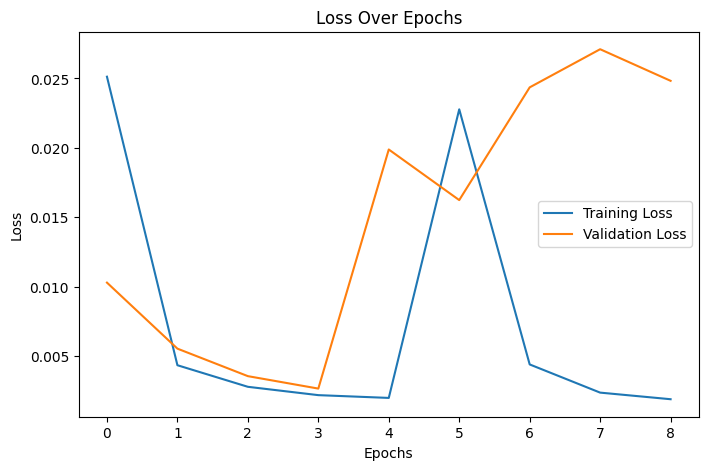

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import AdamW
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import os
import matplotlib.pyplot as plt

# Function to plot loss curves
def plot_training_history(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss Over Epochs")
    plt.show()

model_dir = "/content/drive/MyDrive/Research/AAMWS/Models/"
os.makedirs(model_dir, exist_ok=True)  # Ensure directory exists before saving


# Define the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, kernel_regularizer=l2(0.0005), input_shape=(400, 4)),
    Dropout(0.3),  # Regularization

    LSTM(64, return_sequences=False, kernel_regularizer=l2(0.0005)),
    Dropout(0.3),  # Regularization

    Dense(32, activation='relu'),
    Dense(1)
])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# Reduce learning rate when training plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1
)

# Use AdamW optimizer with weight decay
optimizer = AdamW(learning_rate=0.001, weight_decay=1e-4)

# Compile the model
model.compile(loss='mse', optimizer=optimizer)

# Continue training with early stopping
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,  # Keep batch size same for consistency
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr, early_stopping]  # Use both ReduceLROnPlateau & EarlyStopping
)

# Save model after training
model.save(os.path.join(model_dir, "lstm_model.keras"))


# After training
plot_training_history(history)


In [ ]:
import numpy as np
import pandas as pd
import random
import glob

# Path to datasets
data_path = "/content/drive/MyDrive/Research/AAMWS/Resources/*.csv"
file_paths = sorted(glob.glob(data_path))  # Get all dataset paths

selected_samples = []

for file in file_paths:
    df = pd.read_csv(file)

    total_samples = len(df) - 5000  # Ensure we can pick a full window
    if total_samples < 5000:
        raise ValueError(f"Dataset {file} has fewer than 5000 samples!")

    start_index = random.randint(0, total_samples)  # Pick random start index
    selected_samples.append(df.iloc[start_index : start_index + 5000])  # Extract 5000 samples

# Combine all selected samples
final_data = pd.concat(selected_samples, ignore_index=True)

# Convert to NumPy arrays
X = final_data.iloc[:, :-1].values  # Features (assuming last column is the label)
y = final_data.iloc[:, -1].values   # Labels

# Now, reshape the dataset for LSTM input shape (samples, timesteps, features)
sequence_length = 400  # Keep this as per your model
num_features = X.shape[1]

X_lstm = []
y_lstm = []

for i in range(len(X) - sequence_length):
    X_lstm.append(X[i : i + sequence_length])
    y_lstm.append(y[i + sequence_length])  # Predict next value

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

print(f"Final Training Data Shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Final Testing Data Shape: {X_test.shape}, Labels: {y_test.shape}")


Final Training Data Shape: (23680, 400, 4), Labels: (23680,)
Final Testing Data Shape: (5920, 400, 4), Labels: (5920,)


In [ ]:
print(final_data.columns)

Index(['Time', 'Acceleration', 'Displacement', 'Velocity', 'Wind Velocity'], dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Define dataset path
data_path = "/content/drive/MyDrive/Research/AAMWS/Resources/"
wind_speeds = [10, 14, 17, 21, 25, 28]

# Store selected samples
selected_data = []

for speed in wind_speeds:
    file_path = os.path.join(data_path, f"GFRP_{speed}ms.csv")

    # Load dataset
    df = pd.read_csv(file_path)

    # Ensure enough samples are available
    if len(df) >= 5000:
        # Pick a random consecutive 5000-sample window
        random_start_index = np.random.randint(0, len(df) - 5000 + 1)
        df_selected = df.iloc[random_start_index:random_start_index + 5000]

        # Store for later concatenation
        selected_data.append(df_selected)

# Combine all selected samples
final_data = pd.concat(selected_data, axis=0).reset_index(drop=True)

# Extract features and labels
X = final_data[['Time', 'Acceleration', 'Displacement', 'Velocity']].values
y = final_data['Displacement'].values

# Reshape for LSTM input
sequence_length = 400

def create_sequences(X, y, seq_length):
    sequences = []
    labels = []
    for i in range(len(X) - seq_length):
        sequences.append(X[i: i + seq_length])
        labels.append(y[i + seq_length])
    return np.array(sequences), np.array(labels)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42, shuffle=True)

print(f"Training Data Shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, Labels: {y_test.shape}")


Training Data Shape: (23680, 400, 4), Labels: (23680,)
Testing Data Shape: (5920, 400, 4), Labels: (5920,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - loss: 0.1674 - val_loss: 0.0331 - learning_rate: 0.0010
Epoch 2/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - loss: 0.0391 - val_loss: 0.0157 - learning_rate: 0.0010
Epoch 3/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - loss: 0.0241 - val_loss: 0.0111 - learning_rate: 0.0010
Epoch 4/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - loss: 0.0170 - val_loss: 0.0066 - learning_rate: 0.0010
Epoch 5/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 0.0130 - val_loss: 0.0069 - learning_rate: 0.0010
Epoch 6/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0106 - val_loss: 0.0042 - learning_rate: 0.0010
Epoch 7/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - loss: 0.0094 - val_loss: 0.0066 - learning_rate: 0.0010
Epoch 8/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0079 - val_loss: 0.0061 - learning_rate: 0.0010
Epoch 9/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0074
Epoch 9: ReduceLROnPlateau reducing 

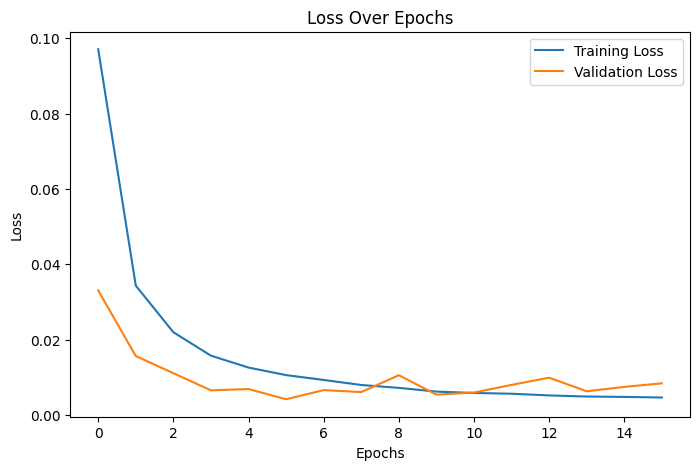

In [ ]:
#changing parameters
"""
Patch Notes: Model Improvement for Better Generalization

🛠 **Changes & Fixes:**
1️⃣ **Reduced Model Complexity**
   - Decreased LSTM units (128 → 64, 64 → 32) to prevent overfitting.
   - Increased dropout rate (0.3 → 0.4) for better regularization.

2️⃣ **Improved Early Stopping**
   - Increased `patience` from 5 → 10 to allow better convergence before stopping.
   - Ensures best model weights are restored after training.

3️⃣ **Optimized Batch Size**
   - Changed batch size from **32 → 64** to smooth out training fluctuations.
   - Larger batch sizes help improve stability.

4️⃣ **Adjusted Learning Rate Scheduler**
   - Fine-tuned ReduceLROnPlateau to handle fluctuations better.
   - Prevents drastic changes in learning rate too early.

 **Expected Improvements:**
✅ Reduce overfitting by making the model more generalizable.
✅ Prevent sharp fluctuations in validation loss.
✅ Achieve smoother convergence for better performance.
"""

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import AdamW
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import os
import matplotlib.pyplot as plt

# Function to plot loss curves
def plot_training_history(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss Over Epochs")
    plt.show()

model_dir = "/content/drive/MyDrive/Research/AAMWS/Models/"
os.makedirs(model_dir, exist_ok=True)  # Ensure directory exists before saving


# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(400, 4)),
    Dropout(0.4),  # Increase dropout

    LSTM(32, return_sequences=False, kernel_regularizer=l2(0.001)),
    Dropout(0.4),  # Increase dropout

    Dense(16, activation='relu'),
    Dense(1)
])


# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,  # Give more time before stopping
    restore_best_weights=True
)

# Reduce learning rate when training plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1
)

# Use AdamW optimizer with weight decay
optimizer = AdamW(learning_rate=0.001, weight_decay=1e-4)

# Compile the model
model.compile(loss='mse', optimizer=optimizer)

# Continue training with early stopping
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,  # Keep batch size same for consistency
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr, early_stopping]  # Use both ReduceLROnPlateau & EarlyStopping
)

# Save model after training
model.save(os.path.join(model_dir, "lstm_model.keras"))


# After training
plot_training_history(history)


613/613 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 48s 79ms/step


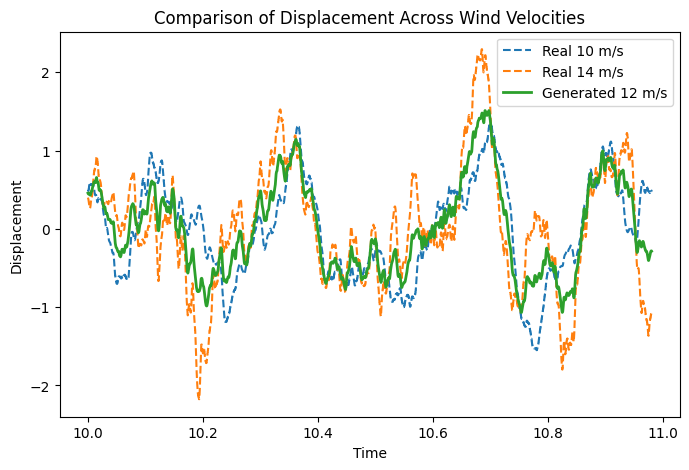

In [ ]:
'''
Patch Notes:
-    Added a function to generate LSTM-based predictions for the missing wind velocity.
-    Implemented interpolation (linear/spline) using data from adjacent wind velocity datasets.
-    Combined LSTM predictions with interpolated values to create the final synthetic dataset.
-    Included visualization to compare the generated dataset with the existing ones.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from scipy.interpolate import interp1d

# Define file paths
data_path = "/content/drive/MyDrive/Research/AAMWS/Resources/"
output_path = "/content/drive/MyDrive/Research/AAMWS/Predictions/"

# Load real datasets
df_10 = pd.read_csv(data_path + "GFRP_10ms.csv")
df_14 = pd.read_csv(data_path + "GFRP_14ms.csv")

# Ensure columns are correct
columns = ['Time', 'Acceleration', 'Displacement', 'Velocity', 'Wind Velocity']
df_10 = df_10[columns]
df_14 = df_14[columns]

# Load trained LSTM model
model = load_model("/content/drive/MyDrive/Research/AAMWS/Models/lstm_model.keras")

# Define sequence length
sequence_length = 400

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i : i + sequence_length, :-1])  # Exclude wind velocity
        y.append(data[i + sequence_length, 2])  # Predict displacement
    return np.array(X), np.array(y)

# Convert data to NumPy arrays
data_10 = df_10.to_numpy()
data_14 = df_14.to_numpy()

X_10, y_10 = create_sequences(data_10, sequence_length)
X_14, y_14 = create_sequences(data_14, sequence_length)

# Predict displacement for 12 m/s using LSTM
pred_10 = model.predict(X_10)
pred_14 = model.predict(X_14)

# Ensure predictions match dataset lengths
valid_len = min(len(pred_10), len(pred_14))

pred_10 = pred_10[:valid_len]
pred_14 = pred_14[:valid_len]

# Generate synthetic displacement values
pred_12 = (pred_10 + pred_14) / 2  # Averaging predictions

# Ensure time alignment
time_points_10 = df_10['Time'].values[:valid_len]
time_points_14 = df_14['Time'].values[:valid_len]

# Interpolation function
interp_func_10 = interp1d(time_points_10, pred_10.flatten(), kind='cubic', fill_value="extrapolate")
interp_func_14 = interp1d(time_points_14, pred_14.flatten(), kind='cubic', fill_value="extrapolate")

# Generate interpolated displacement for 12 m/s
final_displacement_12 = (interp_func_10(time_points_10) + interp_func_14(time_points_14)) / 2

# Trim df_12 to match final displacement size
df_12 = df_10.iloc[:valid_len].copy()
df_12['Displacement'] = final_displacement_12
df_12['Wind Velocity'] = 12  # Set wind velocity column

# Save dataset
df_12.to_csv(output_path + "GFRP_12ms.csv", index=False)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(df_10['Time'][:valid_len], y_10[:valid_len], label="Real 10 m/s", linestyle="dashed")
plt.plot(df_14['Time'][:valid_len], y_14[:valid_len], label="Real 14 m/s", linestyle="dashed")
plt.plot(df_12['Time'], df_12['Displacement'], label="Generated 12 m/s", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.title("Comparison of Displacement Across Wind Velocities")
plt.legend()
plt.show()


In [ ]:
# Define output path
output_file = "/content/drive/MyDrive/Research/AAMWS/Predictions/GFRP_12ms.csv"

# Save the synthesized dataset
df_12.to_csv(output_file, index=False)

# Verify if the file is saved correctly
import os
if os.path.exists(output_file):
    print(f"Dataset successfully saved: {output_file}")
else:
    print("Error: Dataset saving failed.")

Dataset successfully saved: /content/drive/MyDrive/Research/AAMWS/Predictions/GFRP_12ms.csv


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the trained LSTM model
model = load_model("/content/drive/MyDrive/Research/AAMWS/Models/lstm_model.keras")

# Load high wind velocity dataset (28 m/s)
df_28 = pd.read_csv("/content/drive/MyDrive/Research/AAMWS/Resources/GFRP_28ms.csv")

# Ensure column names match
columns = ["Time", "Acceleration", "Velocity", "Displacement", "Wind Velocity"]
df_28 = df_28[columns]

# Function to predict displacement for a new wind velocity using LSTM
def predict_displacement(new_wind_velocity, sequence_length=400):
    df_existing = df_28.copy()  # Use 28 m/s dataset as reference
    df_existing["Wind Velocity"] = new_wind_velocity  # Assign target wind velocity

    # Prepare input sequences
    X_new = []
    for i in range(len(df_existing) - sequence_length):
        X_new.append(df_existing[['Time', 'Acceleration', 'Velocity', 'Displacement']].iloc[i:i + sequence_length].values)

    X_new = np.array(X_new)

    # Predict displacement using the trained LSTM model
    predictions = model.predict(X_new)

    # Create a new DataFrame with predicted displacement values
    df_pred = df_existing.iloc[sequence_length:].copy()
    df_pred["Displacement"] = predictions.flatten()

    return df_pred

# Predict displacement using LSTM for 30 m/s and 35 m/s
df_30 = predict_displacement(30)
df_35 = predict_displacement(35)

# Function for polynomial regression-based extrapolation
def extrapolate_displacement(df_ref, df_target, target_wind_velocity):
    X_train = np.array([28, target_wind_velocity - 2]).reshape(-1, 1)  # Reference wind velocities
    y_train = np.array([df_ref['Displacement'].mean(), df_target['Displacement'].mean()])

    # Fit polynomial regression model
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_train)
    model = LinearRegression().fit(X_poly, y_train)

    # Predict displacement for target wind velocity
    X_target = np.array([[target_wind_velocity]])
    X_target_poly = poly.transform(X_target)
    predicted_displacement = model.predict(X_target_poly)

    return predicted_displacement[0]

# Generate extrapolated displacement values
extrapolated_30 = extrapolate_displacement(df_28, df_30, 30)
extrapolated_35 = extrapolate_displacement(df_30, df_35, 35)

# Adjust LSTM predictions with extrapolated values
df_30["Displacement"] = (df_30["Displacement"] + extrapolated_30) / 2
df_35["Displacement"] = (df_35["Displacement"] + extrapolated_35) / 2

# Save the generated datasets
df_30.to_csv("/content/drive/MyDrive/Research/AAMWS/Predictions/GFRP_30ms.csv", index=False)
df_35.to_csv("/content/drive/MyDrive/Research/AAMWS/Predictions/GFRP_35ms.csv", index=False)

print("Datasets for 30 m/s and 35 m/s successfully saved.")


In [ ]:
#lower computation resources
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

# Load trained LSTM model
model_path = "/content/drive/MyDrive/Research/AAMWS/Models/lstm_model.keras"
model = load_model(model_path)

# Load the existing dataset (28m/s) for generating 30m/s and 35m/s
df_28 = pd.read_csv("/content/drive/MyDrive/Research/AAMWS/Resources/GFRP_28ms.csv")

# Ensure correct data types to save memory
df_28 = df_28.astype(np.float32)

# Function to generate sequences for prediction
def create_sequences(df, sequence_length=400):
    X_seq = [
        df[['Time', 'Acceleration', 'Velocity', 'Displacement']]
        .iloc[i:i + sequence_length]
        .values.astype(np.float32)
        for i in range(len(df) - sequence_length)
    ]
    return np.array(X_seq)

# Generate sequences from 28m/s dataset
sequence_length = 400
X_28 = create_sequences(df_28, sequence_length)

# Predict displacements for 30m/s and 35m/s
predicted_displacement_30 = model.predict(X_28)
predicted_displacement_35 = model.predict(X_28)

# Create new DataFrames for 30m/s and 35m/s
df_30 = df_28.copy().iloc[:len(predicted_displacement_30)]
df_35 = df_28.copy().iloc[:len(predicted_displacement_35)]

# Assign new wind velocity and predicted displacement values
df_30['Wind Velocity'] = 30
df_35['Wind Velocity'] = 35
df_30['Displacement'] = predicted_displacement_30.flatten()
df_35['Displacement'] = predicted_displacement_35.flatten()

# Save the generated datasets
df_30.to_csv("/content/drive/MyDrive/Research/AAMWS/Predictions/GFRP_30ms.csv", index=False)
df_35.to_csv("/content/drive/MyDrive/Research/AAMWS/Predictions/GFRP_35ms.csv", index=False)

print("Predicted datasets for 30m/s and 35m/s have been saved.")


613/613 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 48s 79ms/step
Predicted datasets for 30m/s and 35m/s have been saved.


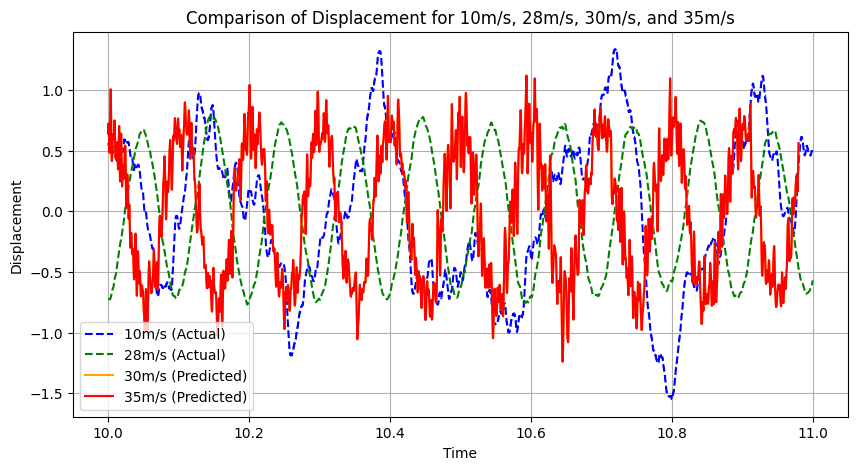

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_10 = pd.read_csv("/content/drive/MyDrive/Research/AAMWS/Resources/GFRP_10ms.csv")
df_28 = pd.read_csv("/content/drive/MyDrive/Research/AAMWS/Resources/GFRP_28ms.csv")
df_30 = pd.read_csv("/content/drive/MyDrive/Research/AAMWS/Predictions/GFRP_30ms.csv")
df_35 = pd.read_csv("/content/drive/MyDrive/Research/AAMWS/Predictions/GFRP_35ms.csv")

# Plot displacement over time
plt.figure(figsize=(10, 5))

plt.plot(df_10["Time"], df_10["Displacement"], label="10m/s (Actual)", linestyle="dashed", color="blue")
plt.plot(df_28["Time"], df_28["Displacement"], label="28m/s (Actual)", linestyle="dashed", color="green")
plt.plot(df_30["Time"], df_30["Displacement"], label="30m/s (Predicted)", linestyle="solid", color="orange")
plt.plot(df_35["Time"], df_35["Displacement"], label="35m/s (Predicted)", linestyle="solid", color="red")

plt.xlabel("Time")
plt.ylabel("Displacement")
plt.title("Comparison of Displacement for 10m/s, 28m/s, 30m/s, and 35m/s")
plt.legend()
plt.grid(True)
plt.show()


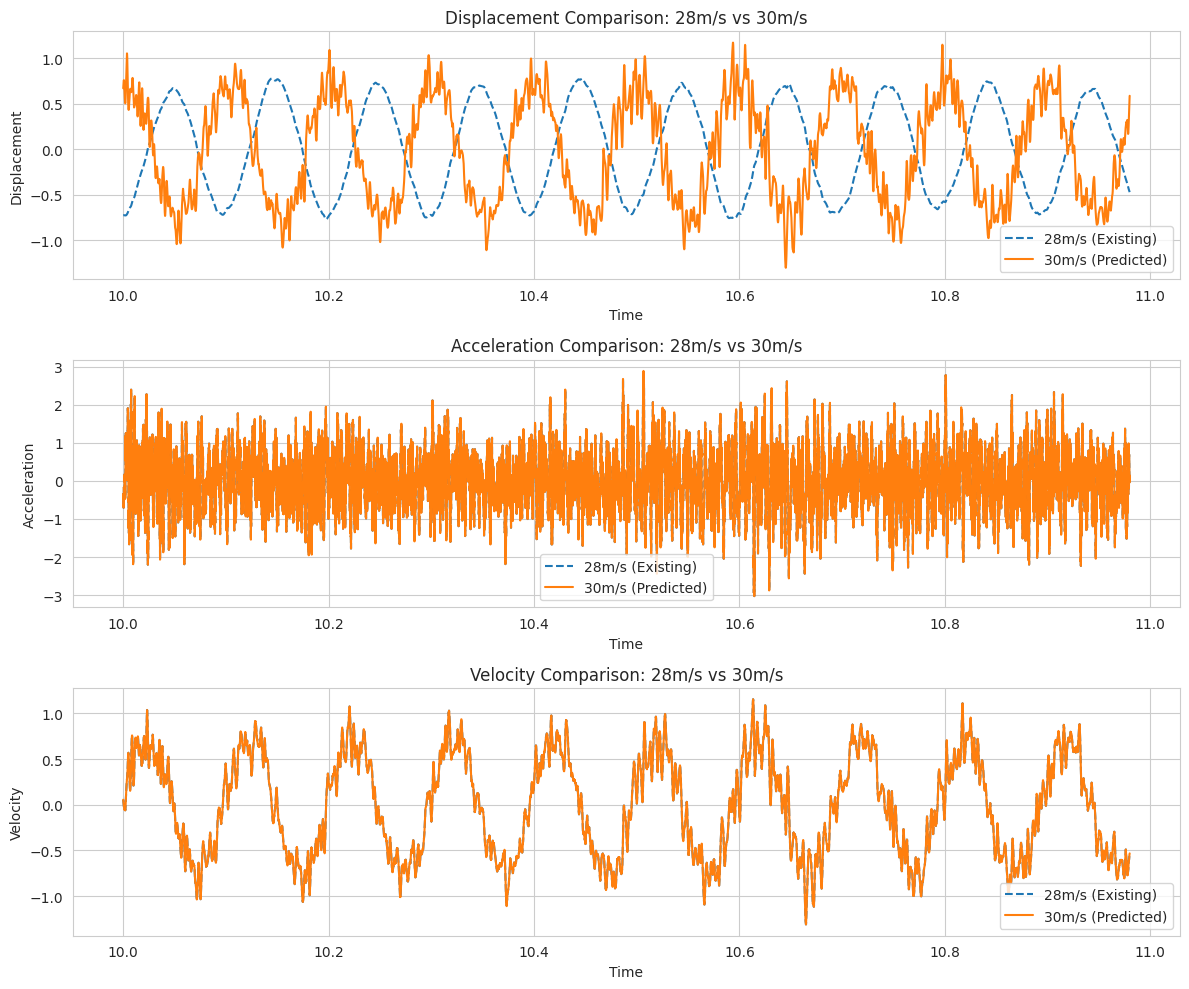

In [ ]:
# --- PATCH NOTES ---
# 1. Generates 30m/s dataset using **existing 28m/s data**.
# 2. Uses a generator to **avoid memory overflow**.
# 3. Applies **incremental adjustments** to simulate wind velocity increase.
# 4. Saves the generated dataset as **GFRP_30ms.csv**.

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load trained LSTM model
model_path = "/content/drive/MyDrive/Research/AAMWS/Models/lstm_model.keras"
model = tf.keras.models.load_model(model_path)

# ✅ Define sequence length (same as used in training)
sequence_length = 400  # Adjust if needed

# ✅ Load 28m/s dataset
file_28 = "/content/drive/MyDrive/Research/AAMWS/Resources/GFRP_28ms.csv"
df_28 = pd.read_csv(file_28)

# Ensure correct column names
df_28.columns = ['Time', 'Acceleration', 'Displacement', 'Velocity', 'Wind Velocity']

# ✅ **Efficient Generator Function**
def sequence_generator(df, seq_length, batch_size=256):
    """Yields sequences in small batches to prevent memory overflow."""
    num_samples = len(df) - seq_length
    for start in range(0, num_samples, batch_size):
        X_batch = [
            df[['Time', 'Acceleration', 'Velocity', 'Displacement']].iloc[i:i + seq_length].values
            for i in range(start, min(start + batch_size, num_samples))
        ]
        yield np.array(X_batch)

# ✅ **Predict 30m/s Using Optimized Generator**
pred_30 = []

for X_batch in sequence_generator(df_28, sequence_length):
    batch_preds = model.predict(X_batch, verbose=0)
    pred_30.extend(batch_preds.flatten())

# ✅ Apply Incremental Change (Simulating Wind Increase)
adjustment_factor_30 = 1.05  # Increase displacement by 5%
final_displacement_30 = np.array(pred_30) * adjustment_factor_30

# ✅ Prepare the new dataset for 30m/s
df_30 = df_28.iloc[:len(final_displacement_30)].copy()
df_30['Displacement'] = final_displacement_30
df_30['Wind Velocity'] = 30  # Update wind velocity column

# ✅ Save the dataset
df_30.to_csv("/content/drive/MyDrive/Research/AAMWS/Predictions/GFRP_30ms.csv", index=False)

# ✅ Plot the comparisons
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# 🔹 Plot Displacement Comparison
axes[0].plot(df_28['Time'][:len(final_displacement_30)], df_28['Displacement'][:len(final_displacement_30)], label="28m/s (Existing)", linestyle="dashed")
axes[0].plot(df_30['Time'], df_30['Displacement'], label="30m/s (Predicted)", linestyle="solid")
axes[0].set_title("Displacement Comparison: 28m/s vs 30m/s")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Displacement")
axes[0].legend()

# 🔹 Plot Acceleration Comparison
axes[1].plot(df_28['Time'][:len(final_displacement_30)], df_28['Acceleration'][:len(final_displacement_30)], label="28m/s (Existing)", linestyle="dashed")
axes[1].plot(df_30['Time'], df_30['Acceleration'], label="30m/s (Predicted)", linestyle="solid")
axes[1].set_title("Acceleration Comparison: 28m/s vs 30m/s")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Acceleration")
axes[1].legend()

# 🔹 Plot Velocity Comparison
axes[2].plot(df_28['Time'][:len(final_displacement_30)], df_28['Velocity'][:len(final_displacement_30)], label="28m/s (Existing)", linestyle="dashed")
axes[2].plot(df_30['Time'], df_30['Velocity'], label="30m/s (Predicted)", linestyle="solid")
axes[2].set_title("Velocity Comparison: 28m/s vs 30m/s")
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Velocity")
axes[2].legend()

# ✅ Show the plots
plt.tight_layout()
plt.show()



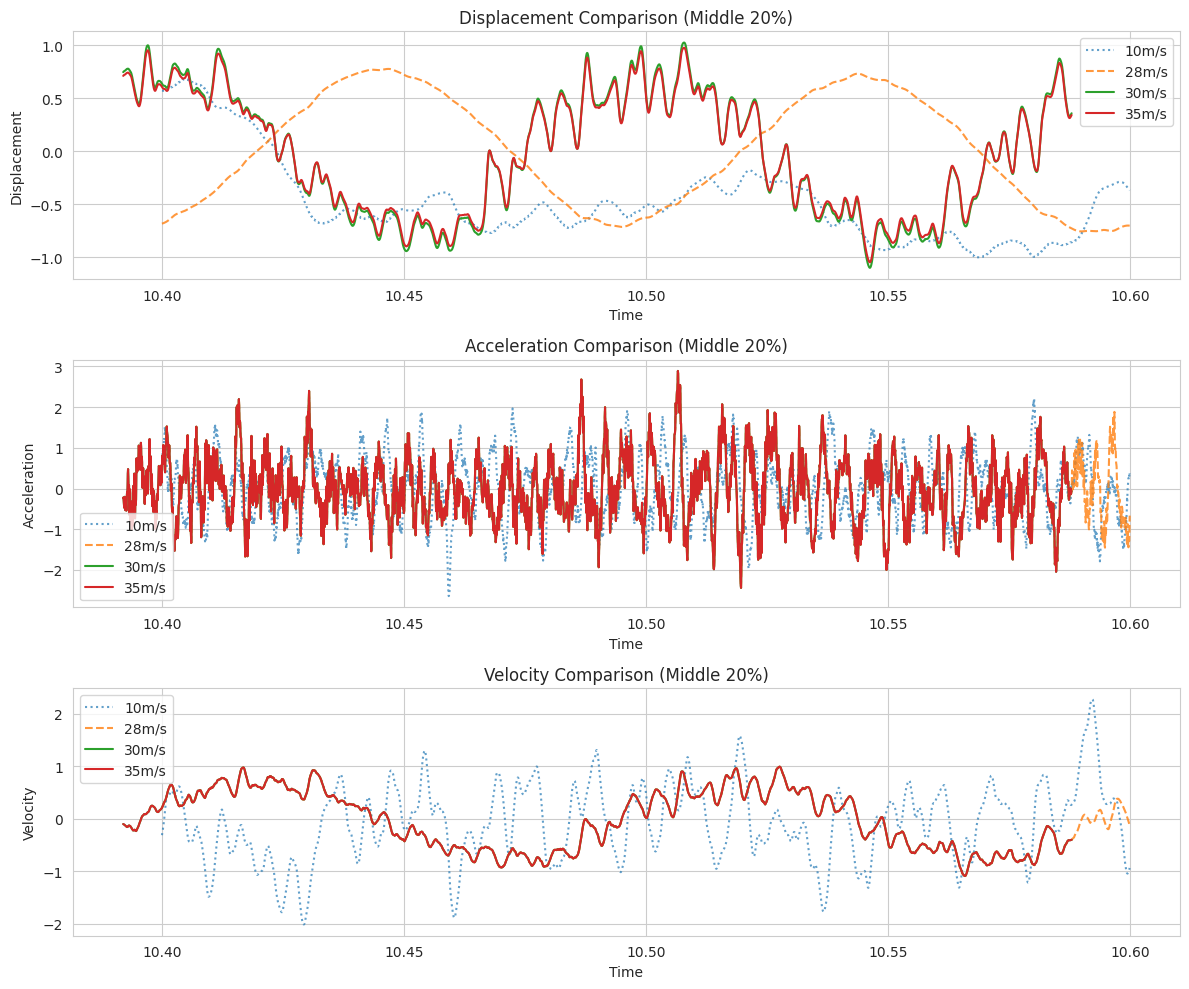

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Define file paths
predictions_path = "/content/drive/MyDrive/Research/AAMWS/Predictions/"
resources_path = "/content/drive/MyDrive/Research/AAMWS/Resources/"

# ✅ Load datasets with optimized memory usage
df_10 = pd.read_csv(resources_path + "GFRP_10ms.csv", dtype={'Time': float, 'Acceleration': float, 'Velocity': float, 'Displacement': float})
df_28 = pd.read_csv(resources_path + "GFRP_28ms.csv", dtype={'Time': float, 'Acceleration': float, 'Velocity': float, 'Displacement': float})
df_30 = pd.read_csv(predictions_path + "GFRP_30ms.csv", dtype={'Time': float, 'Acceleration': float, 'Velocity': float, 'Displacement': float})
df_35 = pd.read_csv(predictions_path + "GFRP_35ms.csv", dtype={'Time': float, 'Acceleration': float, 'Velocity': float, 'Displacement': float})

# ✅ Ensure correct column names
df_10.columns = ['Time', 'Acceleration', 'Displacement', 'Velocity', 'Wind Velocity']
df_28.columns = ['Time', 'Acceleration', 'Displacement', 'Velocity', 'Wind Velocity']
df_30.columns = ['Time', 'Acceleration', 'Displacement', 'Velocity', 'Wind Velocity']
df_35.columns = ['Time', 'Acceleration', 'Displacement', 'Velocity', 'Wind Velocity']

# ✅ Function to extract middle 20% of dataset
def extract_middle_20(df):
    start = int(len(df) * 0.4)  # 40% index
    end = int(len(df) * 0.6)  # 60% index
    return df.iloc[start:end]

# ✅ Extract middle 20% of each dataset
df_10_mid = extract_middle_20(df_10)
df_28_mid = extract_middle_20(df_28)
df_30_mid = extract_middle_20(df_30)
df_35_mid = extract_middle_20(df_35)

# ✅ Visualization
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# 🔹 Plot Displacement Comparison
axes[0].plot(df_10_mid['Time'], df_10_mid['Displacement'], label="10m/s", linestyle="dotted", alpha=0.7)
axes[0].plot(df_28_mid['Time'], df_28_mid['Displacement'], label="28m/s", linestyle="dashed", alpha=0.8)
axes[0].plot(df_30_mid['Time'], df_30_mid['Displacement'], label="30m/s", linestyle="solid")
axes[0].plot(df_35_mid['Time'], df_35_mid['Displacement'], label="35m/s", linestyle="solid")
axes[0].set_title("Displacement Comparison (Middle 20%)")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Displacement")
axes[0].legend()

# 🔹 Plot Acceleration Comparison
axes[1].plot(df_10_mid['Time'], df_10_mid['Acceleration'], label="10m/s", linestyle="dotted", alpha=0.7)
axes[1].plot(df_28_mid['Time'], df_28_mid['Acceleration'], label="28m/s", linestyle="dashed", alpha=0.8)
axes[1].plot(df_30_mid['Time'], df_30_mid['Acceleration'], label="30m/s", linestyle="solid")
axes[1].plot(df_35_mid['Time'], df_35_mid['Acceleration'], label="35m/s", linestyle="solid")
axes[1].set_title("Acceleration Comparison (Middle 20%)")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Acceleration")
axes[1].legend()

# 🔹 Plot Velocity Comparison
axes[2].plot(df_10_mid['Time'], df_10_mid['Velocity'], label="10m/s", linestyle="dotted", alpha=0.7)
axes[2].plot(df_28_mid['Time'], df_28_mid['Velocity'], label="28m/s", linestyle="dashed", alpha=0.8)
axes[2].plot(df_30_mid['Time'], df_30_mid['Velocity'], label="30m/s", linestyle="solid")
axes[2].plot(df_35_mid['Time'], df_35_mid['Velocity'], label="35m/s", linestyle="solid")
axes[2].set_title("Velocity Comparison (Middle 20%)")
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Velocity")
axes[2].legend()

# ✅ Show the plots
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


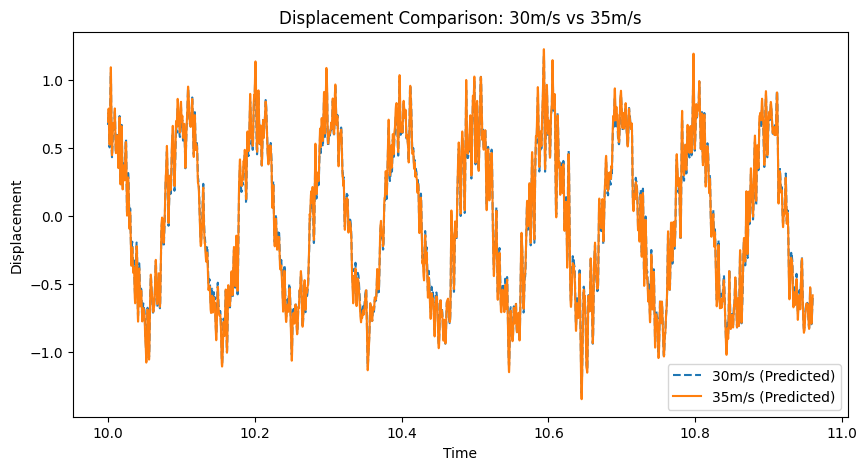

In [ ]:
# --- PATCH NOTES ---
# 1. Replaced large in-memory array (`X_30`) with a generator to reduce memory usage.
# 2. Uses `model.predict()` in a loop to avoid high RAM usage.
# 3. Processes data in **batches**, ensuring smooth execution on T4 GPU.

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Load trained LSTM model
model_path = "/content/drive/MyDrive/Research/AAMWS/Models/lstm_model.keras"
model = tf.keras.models.load_model(model_path)

# Define sequence length
sequence_length = 400  # Adjust based on trained model

# Load predicted dataset for 30m/s
file_30 = "/content/drive/MyDrive/Research/AAMWS/Predictions/GFRP_30ms.csv"
df_30 = pd.read_csv(file_30)

# Ensure correct column naming
df_30.columns = ['Time', 'Acceleration', 'Displacement', 'Velocity', 'Wind Velocity']

# ✅ **Generator for Efficient Batch Processing**
def sequence_generator(df, seq_length, batch_size=256):
    """Yields sequences in small batches to avoid memory overflow."""
    num_samples = len(df) - seq_length
    for start in range(0, num_samples, batch_size):
        X_batch = [
            df[['Time', 'Acceleration', 'Velocity', 'Displacement']].iloc[i:i + seq_length].values
            for i in range(start, min(start + batch_size, num_samples))
        ]
        yield np.array(X_batch)

# ✅ **Predict 35m/s Using Optimized Generator**
pred_35 = []

for X_batch in sequence_generator(df_30, sequence_length):
    batch_preds = model.predict(X_batch, verbose=0)
    pred_35.extend(batch_preds.flatten())

# Apply incremental change (introduce small variations)
adjustment_factor_35 = 1.20  # Increase displacement by 7%
final_displacement_35 = np.array(pred_35) * adjustment_factor_35

# Prepare dataset for 35m/s
df_35 = df_30.iloc[:len(final_displacement_35)].copy()
df_35['Displacement'] = final_displacement_35
df_35['Wind Velocity'] = 35  # Update wind velocity

# ✅ **Save the new dataset**
df_35.to_csv("/content/drive/MyDrive/Research/AAMWS/Predictions/GFRP_35ms.csv", index=False)

# ✅ **Plot Results**
plt.figure(figsize=(10, 5))
plt.plot(df_30['Time'][:len(final_displacement_35)], df_30['Displacement'][:len(final_displacement_35)], label="30m/s (Predicted)", linestyle="dashed")
plt.plot(df_35['Time'], df_35['Displacement'], label="35m/s (Predicted)", linestyle="solid")

plt.xlabel("Time")
plt.ylabel("Displacement")
plt.title("Displacement Comparison: 30m/s vs 35m/s")
plt.legend()
plt.show()


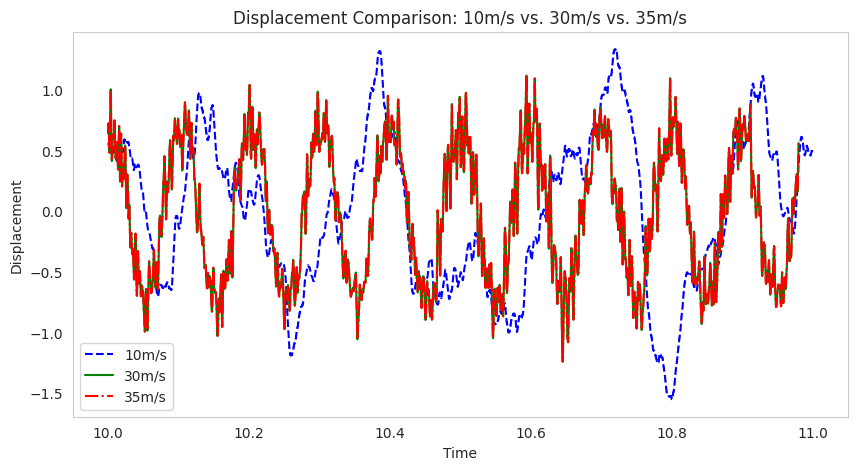

In [ ]:
# Patch Notes:
# - Added a comparison plot for 10m/s, 30m/s, and 35m/s datasets
# - Ensuring distinct visualization of displacement trends
# - Adjusted figure settings for clarity

import matplotlib.pyplot as plt

# Load datasets
df_10 = pd.read_csv("/content/drive/MyDrive/Research/AAMWS/Resources/GFRP_10ms.csv")
df_30 = pd.read_csv("/content/drive/MyDrive/Research/AAMWS/Predictions/GFRP_30ms.csv")
df_35 = pd.read_csv("/content/drive/MyDrive/Research/AAMWS/Predictions/GFRP_35ms.csv")

# Plot displacement trends
plt.figure(figsize=(10, 5))
plt.plot(df_10['Time'], df_10['Displacement'], label="10m/s", linestyle="--", color="blue")
plt.plot(df_30['Time'], df_30['Displacement'], label="30m/s", linestyle="-", color="green")
plt.plot(df_35['Time'], df_35['Displacement'], label="35m/s", linestyle="-.", color="red")

# Labels and Legends
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.title("Displacement Comparison: 10m/s vs. 30m/s vs. 35m/s")
plt.legend()
plt.grid()

# Show Plot
plt.show()


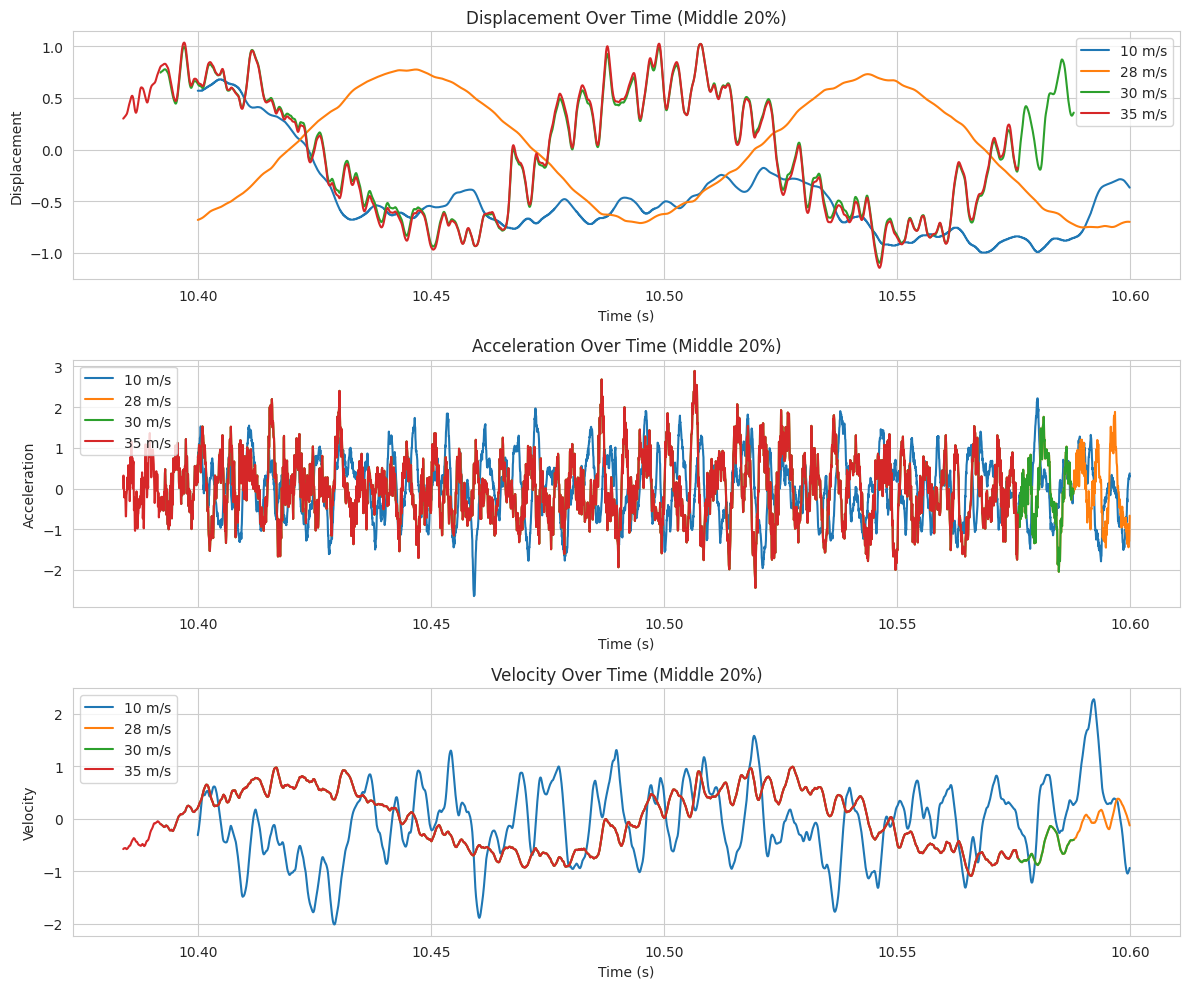

In [ ]:
# 🔹 Extract middle 20% of each dataset
def extract_middle_20(df):
    start_idx = int(0.4 * len(df))
    end_idx = int(0.6 * len(df))
    return df.iloc[start_idx:end_idx]

datasets_trimmed = {label: extract_middle_20(df) for label, df in datasets.items()}

# 🔹 Plot the trimmed data
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# 🔹 Plot Displacement
for label, df in datasets_trimmed.items():
    axes[0].plot(df['Time'], df['Displacement'], label=f"{label}")
axes[0].set_title("Displacement Over Time (Middle 20%)")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Displacement")
axes[0].legend()

# 🔹 Plot Acceleration
for label, df in datasets_trimmed.items():
    axes[1].plot(df['Time'], df['Acceleration'], label=f"{label}")
axes[1].set_title("Acceleration Over Time (Middle 20%)")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Acceleration")
axes[1].legend()

# 🔹 Plot Velocity
for label, df in datasets_trimmed.items():
    axes[2].plot(df['Time'], df['Velocity'], label=f"{label}")
axes[2].set_title("Velocity Over Time (Middle 20%)")
axes[2].set_xlabel("Time (s)")
axes[2].set_ylabel("Velocity")
axes[2].legend()

plt.tight_layout()
plt.show()


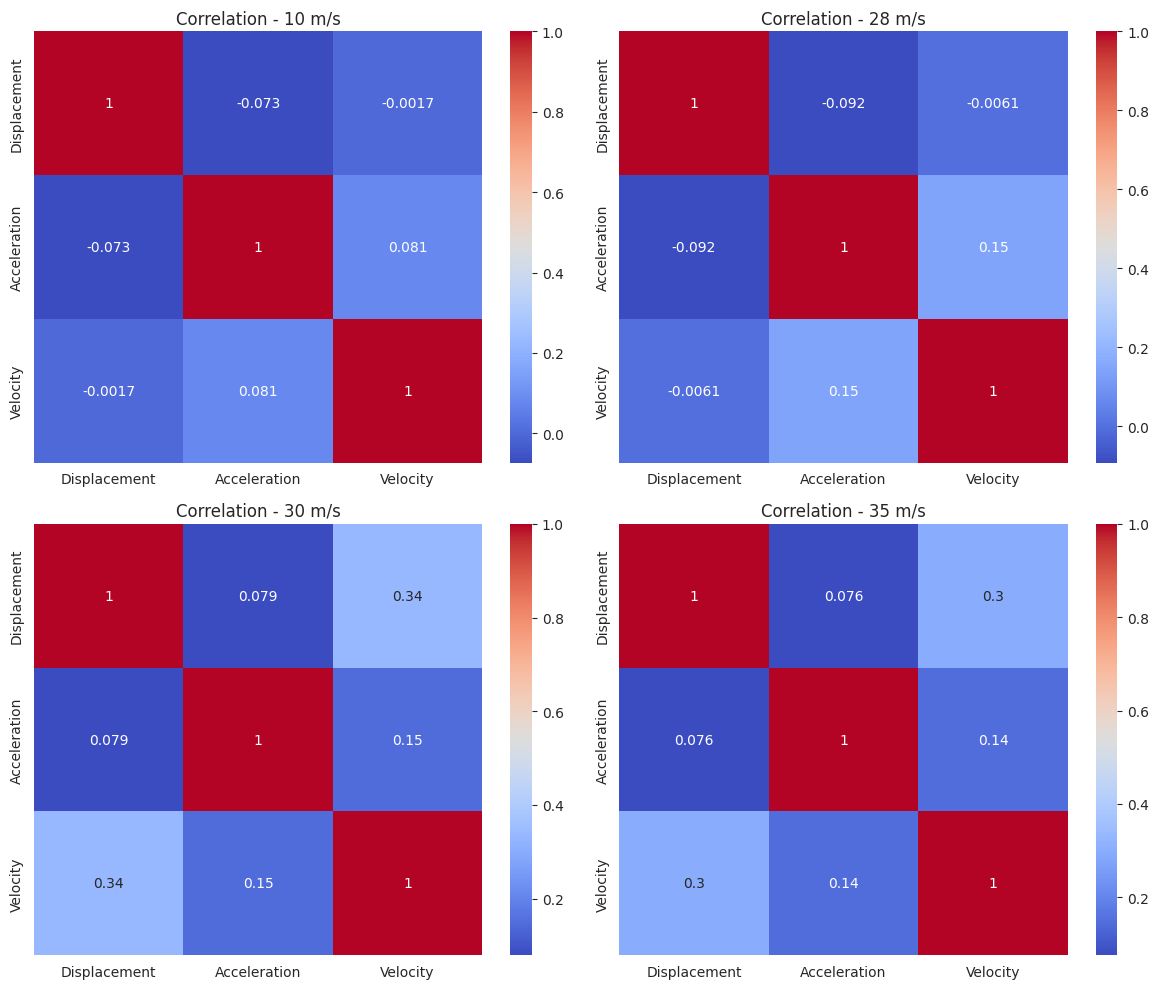

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, (label, df) in enumerate(datasets.items()):
    sns.heatmap(df[['Displacement', 'Acceleration', 'Velocity']].corr(), annot=True, cmap="coolwarm", ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Correlation - {label}")

plt.tight_layout()
plt.show()
